In [14]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8bbacadd-c3b9-4ca5-83d4-8a0ecf59c2f1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2025-08-29T21:00:27.245Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9505}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12310, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [6]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12310,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991340e+07,1.991340e+07,False,NaN,1,NaN,NaN,None,2025-08-29T20:55:00.000Z,107696.879844,7.514341e+10,25.3367,-0.590170,-3.802284,-7.867427,-8.001072,0.093677,2.750508,2.144611e+12,57.4077,2.261634e+12,None,2025-08-29T20:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 03:56:34.928260
1,1027,Ethereum,ETH,ethereum,10488,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207067e+08,1.207067e+08,True,NaN,2,NaN,NaN,None,2025-08-29T20:54:00.000Z,4316.915350,4.364888e+10,20.3614,-0.710321,-3.302086,-10.789547,14.509820,72.217364,69.793122,5.210806e+11,13.9383,5.210806e+11,None,2025-08-29T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 03:56:34.928260
2,825,Tether USDt,USDT,tether,144456,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.673560e+11,1.717330e+11,True,NaN,3,NaN,NaN,None,2025-08-29T20:54:00.000Z,1.000367,1.392993e+11,25.5441,0.024595,0.037652,0.045990,0.071950,0.003318,0.012944,1.674174e+11,4.4776,1.717959e+11,None,2025-08-29T20:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-30 03:56:34.928260
3,52,XRP,XRP,xrp,1692,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,4,NaN,NaN,None,2025-08-29T20:54:00.000Z,2.792916,8.127255e+09,29.7818,-1.277290,-5.460557,-9.343368,-9.846740,22.117610,27.253038,1.661290e+11,4.4431,2.792916e+11,None,2025-08-29T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 03:56:34.928260
4,1839,BNB,BNB,bnb,2694,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391879e+08,1.391879e+08,False,NaN,5,NaN,NaN,None,2025-08-29T20:55:00.000Z,855.788706,2.604403e+09,-7.0511,-0.358528,-1.586178,-4.327737,8.958423,29.692400,29.654900,1.191154e+11,3.1862,1.191154e+11,None,2025-08-29T20:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 03:56:34.928260
5,5426,Solana,SOL,solana,987,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.407956e+08,6.086162e+08,True,NaN,6,5.252369e+08,1.058229e+11,None,2025-08-29T20:54:00.000Z,201.476424,1.401944e+10,13.3379,-1.059565,-5.438671,1.278453,14.449595,28.375697,27.937416,1.089576e+11,2.9145,1.226218e+11,None,2025-08-29T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 03:56:34.928260
6,3408,USDC,USDC,usd-coin,31033,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.153633e+10,7.153633e+10,False,NaN,7,6.090122e+10,6.089773e+10,None,2025-08-29T20:54:00.000Z,0.999943,1.994644e+10,25.1926,0.019389,0.010289,0.004513,0.020383,0.000156,0.016908,7.153223e+10,1.9133,7.153223e+10,None,2025-08-29T20:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-30 03:56:34.928260
7,1958,TRON,TRX,tron,1223,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.465771e+10,9.465771e+10,True,NaN,8,9.466789e+10,3.191174e+10,None,2025-08-29T20:54:00.000Z,0.337091,1.242865e+09,41.5164,-0.100077,-1.862805,-7.975259,2.834442,20.450656,26.518414,3.190831e+10,0.8535,3.190831e+10,None,2025-08-29T20:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 03:56:34.928260
8,74,Dogecoin,DOGE,dogecoin,1285,2013-12-15T00:00:00.000Z,"[mineable, pow, sc

In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8bbacadd-c3b9-4ca5-83d4-8a0ecf59c2f1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(f"API Error: {e}")
      return

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Create new dataframe from API data
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    # Append to existing dataframe or create new one
    if 'df' not in globals() or len(df) == 0:
        df = df2.copy()
    else:
        df = pd.concat([df, df2], ignore_index=True)
    
    # Save to multiple locations for safety
    try:
        # Save to current directory (most reliable)
        local_file = 'crypto_data.csv'
        df.to_csv(local_file, index=False)
        print(f"✅ Saved to local file: {local_file}")
        
        # Try saving to the M: drive location if it exists
        import os
        m_drive_dir = r'M:\Data\Automating-Crypto-Website-API'
        m_drive_file = os.path.join(m_drive_dir, 'API.csv')
        
        if os.path.exists('M:/'):
            os.makedirs(m_drive_dir, exist_ok=True)
            df.to_csv(m_drive_file, index=False)
            print(f"✅ Also saved to M: drive: {m_drive_file}")
        else:
            print("⚠️ M: drive not accessible, only saved locally")
            
    except Exception as e:
        print(f"❌ Error saving CSV: {e}")
    
    print(f'📊 Data collected. Total records in memory: {len(df)}')

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

✅ Saved to local file: crypto_data.csv
❌ Error saving CSV: [Errno 13] Permission denied: 'M:\\Data\\Automating-Crypto-Website-API\\API.csv'
📊 Data collected. Total records in memory: 30
API Runner completed


In [ ]:
# Check if CSV file exists and test the path
import os

csv_path = r'M:\Data\Automating-Crypto-Website-API\API.csv'
directory = r'M:\Data\Automating-Crypto-Website-API'

print(f"Directory path: {directory}")
print(f"Directory exists: {os.path.exists(directory)}")
print(f"CSV file path: {csv_path}")
print(f"CSV file exists: {os.path.exists(csv_path)}")

# Check if M: drive exists
print(f"M: drive accessible: {os.path.exists('M:/')}")

# Let's try saving to a simpler local path instead
local_path = 'crypto_data.csv'
print(f"Current working directory: {os.getcwd()}")

# Test saving to current directory
df.to_csv(local_path, index=False)
print(f"Saved to local file: {local_path}")
print(f"Local file exists: {os.path.exists(local_path)}")

# Display current dataframe
print(f"\nDataframe shape: {df.shape}")
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12310,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991336e+07,1.991336e+07,False,NaN,1,NaN,NaN,None,2025-08-29T19:03:00.000Z,108122.425994,7.372912e+10,15.5455,-0.231031,-3.876499,-7.410113,-6.965620,0.702433,3.300056,2.153081e+12,57.5148,2.270571e+12,None,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
1,1027,Ethereum,ETH,ethereum,10488,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207067e+08,1.207067e+08,True,NaN,2,NaN,NaN,None,2025-08-29T19:03:00.000Z,4317.168746,4.680762e+10,13.0594,-0.270663,-3.848877,-10.013901,15.895459,73.095151,69.799580,5.211112e+11,13.9209,5.211112e+11,None,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
2,825,Tether USDt,USDT,tether,144454,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.673560e+11,1.717330e+11,True,NaN,3,NaN,NaN,None,2025-08-29T19:02:00.000Z,0.999926,1.380516e+11,13.5221,0.002778,-0.033643,0.005825,0.004647,-0.026220,-0.032366,1.673435e+11,4.4704,1.717202e+11,None,2025-08-29T19:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-30 02:03:53.934843
3,52,XRP,XRP,xrp,1692,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,4,NaN,NaN,None,2025-08-29T19:03:00.000Z,2.810118,7.884197e+09,12.0071,-0.360470,-5.708637,-8.709531,-7.651831,24.665072,28.065645,1.671522e+11,4.4653,2.810118e+11,None,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
4,1839,BNB,BNB,bnb,2694,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391879e+08,1.391879e+08,False,NaN,5,NaN,NaN,None,2025-08-29T19:03:00.000Z,854.382939,2.577234e+09,-11.3813,-0.232896,-1.913667,-4.290681,9.522124,29.904952,29.806675,1.189198e+11,3.1768,1.189198e+11,None,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
5,5426,Solana,SOL,solana,987,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.407957e+08,6.086163e+08,True,NaN,6,5.252369e+08,1.062120e+11,None,2025-08-29T19:03:00.000Z,202.217389,1.393099e+10,0.5348,-0.232217,-4.712534,2.804633,15.415755,29.672570,28.629946,1.093583e+11,2.9214,1.230728e+11,None,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
6,3408,USDC,USDC,usd-coin,31032,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.119714e+10,7.119714e+10,False,NaN,7,6.090122e+10,6.091678e+10,None,2025-08-29T19:03:00.000Z,1.000256,2.021825e+10,10.8957,0.039324,0.040549,0.033712,0.044457,0.037774,0.043452,7.121533e+10,1.9024,7.121533e+10,None,2025-08-29T19:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-30 02:03:53.934843
7,1958,TRON,TRX,tron,1223,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.465763e+10,9.465763e+10,True,NaN,8,9.466789e+10,3.182656e+10,None,2025-08-29T19:03:00.000Z,0.336192,1.233282e+09,25.6216,0.006941,-1.990647,-7.940481,3.668546,20.329652,26.378871,3.182311e+10,0.8501,3.182311e+10,None,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
8,74,Dogecoin,DOGE,dogecoin,1285,2013-12-15T00:00:00.000Z,"[mineable, pow, 

In [5]:

df72 = pd.read_csv(r'M:\Data\Automating-Crypto-Website-API\API.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12310,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.991336e+07,1.991336e+07,False,NaN,1,NaN,NaN,NaN,2025-08-29T19:03:00.000Z,108122.425994,7.372912e+10,15.5455,-0.231031,-3.876499,-7.410113,-6.965620,0.702433,3.300056,2.153081e+12,57.5148,2.270571e+12,NaN,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
1,1027,Ethereum,ETH,ethereum,10488,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207067e+08,1.207067e+08,True,NaN,2,NaN,NaN,NaN,2025-08-29T19:03:00.000Z,4317.168746,4.680762e+10,13.0594,-0.270663,-3.848877,-10.013901,15.895459,73.095151,69.799580,5.211112e+11,13.9209,5.211112e+11,NaN,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
2,825,Tether USDt,USDT,tether,144454,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.673560e+11,1.717330e+11,True,NaN,3,NaN,NaN,NaN,2025-08-29T19:02:00.000Z,0.999926,1.380516e+11,13.5221,0.002778,-0.033643,0.005825,0.004647,-0.026220,-0.032366,1.673435e+11,4.4704,1.717202e+11,NaN,2025-08-29T19:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-30 02:03:53.934843
3,52,XRP,XRP,xrp,1692,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,4,NaN,NaN,NaN,2025-08-29T19:03:00.000Z,2.810118,7.884197e+09,12.0071,-0.360470,-5.708637,-8.709531,-7.651831,24.665072,28.065645,1.671522e+11,4.4653,2.810118e+11,NaN,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
4,1839,BNB,BNB,bnb,2694,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.391879e+08,1.391879e+08,False,NaN,5,NaN,NaN,NaN,2025-08-29T19:03:00.000Z,854.382939,2.577234e+09,-11.3813,-0.232896,-1.913667,-4.290681,9.522124,29.904952,29.806675,1.189198e+11,3.1768,1.189198e+11,NaN,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
5,5426,Solana,SOL,solana,987,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.407957e+08,6.086163e+08,True,NaN,6,5.252369e+08,1.062120e+11,NaN,2025-08-29T19:03:00.000Z,202.217389,1.393099e+10,0.5348,-0.232217,-4.712534,2.804633,15.415755,29.672570,28.629946,1.093583e+11,2.9214,1.230728e+11,NaN,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
6,3408,USDC,USDC,usd-coin,31032,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.119714e+10,7.119714e+10,False,NaN,7,6.090122e+10,6.091678e+10,NaN,2025-08-29T19:03:00.000Z,1.000256,2.021825e+10,10.8957,0.039324,0.040549,0.033712,0.044457,0.037774,0.043452,7.121533e+10,1.9024,7.121533e+10,NaN,2025-08-29T19:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-30 02:03:53.934843
7,1958,TRON,TRX,tron,1223,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.465763e+10,9.465763e+10,True,NaN,8,9.466789e+10,3.182656e+10,NaN,2025-08-29T19:03:00.000Z,0.336192,1.233282e+09,25.6216,0.006941,-1.990647,-7.940481,3.668546,20.329652,26.378871,3.182311e+10,0.8501,3.182311e+10,NaN,2025-08-29T19:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:03:53.934843
8,74,Dogecoin,DOGE,dogecoin,1285,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'm

In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12310,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991338e+07,1.991338e+07,False,NaN,1,NaN,NaN,None,2025-08-29T19:32:00.000Z,108692.077759,7.291385e+10,15.0900,0.529046,-3.236228,-6.881586,-6.647027,1.067133,3.769064,2.164427e+12,57.5169,2.282534e+12,None,2025-08-29T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
1,1027,Ethereum,ETH,ethereum,10488,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207067e+08,1.207067e+08,True,NaN,2,NaN,NaN,None,2025-08-29T19:31:00.000Z,4359.949186,4.712989e+10,17.8556,1.037974,-2.719564,-9.548674,17.037234,73.698127,71.490614,5.262751e+11,13.9798,5.262751e+11,None,2025-08-29T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
2,52,XRP,XRP,xrp,1692,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-08-29T19:31:00.000Z,2.829882,7.974559e+09,15.3539,0.907550,-4.985789,-8.570683,-7.886716,23.398793,28.695194,1.683278e+11,4.4730,2.829882e+11,None,2025-08-29T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
3,825,Tether USDt,USDT,tether,144454,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.673560e+11,1.717330e+11,True,NaN,4,NaN,NaN,None,2025-08-29T19:31:00.000Z,0.999990,1.377122e+11,14.9660,-0.009147,-0.000637,0.009487,-0.025801,-0.021559,-0.038576,1.673543e+11,4.4471,1.717312e+11,None,2025-08-29T19:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-30 02:33:01.022017
4,1839,BNB,BNB,bnb,2694,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.391879e+08,1.391879e+08,False,NaN,5,NaN,NaN,None,2025-08-29T19:32:00.000Z,859.397655,2.589726e+09,-10.5563,0.539048,-1.462296,-3.956943,10.452073,30.420915,30.319945,1.196177e+11,3.1782,1.196177e+11,None,2025-08-29T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
5,5426,Solana,SOL,solana,987,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.407956e+08,6.086162e+08,True,NaN,6,5.252369e+08,1.072763e+11,None,2025-08-29T19:31:00.000Z,204.243557,1.400893e+10,2.9342,1.279291,-3.623083,3.137904,17.242721,30.198002,29.435345,1.104540e+11,2.9341,1.243059e+11,None,2025-08-29T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
6,3408,USDC,USDC,usd-coin,31032,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.121068e+10,7.121068e+10,False,NaN,7,6.090122e+10,6.088884e+10,None,2025-08-29T19:31:00.000Z,0.999797,2.037463e+10,16.8400,0.002724,-0.011952,-0.005233,-0.037848,-0.021415,-0.007842,7.119621e+10,1.8919,7.119621e+10,None,2025-08-29T19:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-30 02:33:01.022017
7,74,Dogecoin,DOGE,dogecoin,1285,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.507229e+11,1.507229e+11,True,NaN,8,NaN,NaN,None,2025-08-29T19:32:00.000Z,0.212431,2.520272e+09,12.2665,0.995329,-4.360316,-11.110355,-0.740369,27.477640,9.492385,3.201819e+10,0.8507,3.201819e+10,None,2025-08-29T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
8,1958,TRON,TRX,tron,1223,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosyste

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12310,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19913384.00000,19913384.00000,False,NaN,1,NaN,NaN,None,2025-08-29T19:32:00.000Z,108692.07776,72913852819.54407,15.09000,0.52905,-3.23623,-6.88159,-6.64703,1.06713,3.76906,2164427082172.23975,57.51690,2282533632938.37988,None,2025-08-29T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
1,1027,Ethereum,ETH,ethereum,10488,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120706696.75057,120706696.75057,True,NaN,2,NaN,NaN,None,2025-08-29T19:31:00.000Z,4359.94919,47129894228.27935,17.85560,1.03797,-2.71956,-9.54867,17.03723,73.69813,71.49061,526275064253.91974,13.97980,526275064253.91998,None,2025-08-29T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
2,52,XRP,XRP,xrp,1692,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59482264023.00000,99985819185.00000,False,NaN,3,NaN,NaN,None,2025-08-29T19:31:00.000Z,2.82988,7974559042.48151,15.35390,0.90755,-4.98579,-8.57068,-7.88672,23.39879,28.69519,168327758708.78995,4.47300,282988150289.14001,None,2025-08-29T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
3,825,Tether USDt,USDT,tether,144454,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,167356013557.12241,171732955317.96826,True,NaN,4,NaN,NaN,None,2025-08-29T19:31:00.000Z,0.99999,137712205807.37421,14.96600,-0.00915,-0.00064,0.00949,-0.02580,-0.02156,-0.03858,167354295921.47195,4.44710,171731192760.17001,None,2025-08-29T19:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-30 02:33:01.022017
4,1839,BNB,BNB,bnb,2694,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139187883.07000,139187883.07000,False,NaN,5,NaN,NaN,None,2025-08-29T19:32:00.000Z,859.39765,2589725945.60323,-10.55630,0.53905,-1.46230,-3.95694,10.45207,30.42092,30.31995,119617740302.60150,3.17820,119617740302.60001,None,2025-08-29T19:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
5,5426,Solana,SOL,solana,987,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,540795647.09358,608616243.14167,True,NaN,6,525236893.30000,107276251581.92018,None,2025-08-29T19:31:00.000Z,204.24356,14008928010.06937,2.93420,1.27929,-3.62308,3.13790,17.24272,30.19800,29.43535,110454026805.92293,2.93410,124305946609.92000,None,2025-08-29T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-30 02:33:01.022017
6,3408,USDC,USDC,usd-coin,31032,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,71210678516.57611,71210678516.57611,False,NaN,7,60901219650.23000,60888844662.26352,None,2025-08-29T19:31:00.000Z,0.99980,20374629922.24783,16.84000,0.00272,-0.01195,-0.00523,-0.03785,-0.02141,-0.00784,71196208670.24481,1.89190,71196208670.24001,None,2025-08-29T19:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-30 02:33:01.022017
7,74,Dogecoin,DOGE,dogecoin,1285,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150722886383.70523,150722886383.70523,True,NaN,8,NaN,NaN,None,2025-08-29T19:32:00.000Z,0.21243,2520271553.48737,12.26650,0.99533,-4.36032,-11.11036,-0.74037,27.47764,9.49238,32018187374

In [24]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.52905,-3.23623,-6.88159,-6.64703,1.06713,3.76906
Ethereum,1.03797,-2.71956,-9.54867,17.03723,73.69813,71.49061
XRP,0.90755,-4.98579,-8.57068,-7.88672,23.39879,28.69519
Tether USDt,-0.00915,-0.00064,0.00949,-0.02580,-0.02156,-0.03858
BNB,0.53905,-1.46230,-3.95694,10.45207,30.42092,30.31995
Solana,1.27929,-3.62308,3.13790,17.24272,30.19800,29.43535
USDC,0.00272,-0.01195,-0.00523,-0.03785,-0.02141,-0.00784
Dogecoin,0.99533,-4.36032,-11.11036,-0.74037,27.47764,9.49238
TRON,0.36652,-1.76134,-7.77076,3.50258,20.81350,26.37060


In [25]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.52905
             quote.USD.percent_change_24h    -3.23623
             quote.USD.percent_change_7d     -6.88159
             quote.USD.percent_change_30d    -6.64703
             quote.USD.percent_change_60d     1.06713
             quote.USD.percent_change_90d     3.76906
Ethereum     quote.USD.percent_change_1h      1.03797
             quote.USD.percent_change_24h    -2.71956
             quote.USD.percent_change_7d     -9.54867
             quote.USD.percent_change_30d    17.03723
             quote.USD.percent_change_60d    73.69813
             quote.USD.percent_change_90d    71.49061
XRP          quote.USD.percent_change_1h      0.90755
             quote.USD.percent_change_24h    -4.98579
             quote.USD.percent_change_7d     -8.57068
             quote.USD.percent_change_30d    -7.88672
             quote.USD.percent_change_60d    23.39879
             quote.USD.percent_change_90

In [16]:
type(df4)

pandas.core.series.Series

In [26]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.52905
            quote.USD.percent_change_24h  -3.23623
            quote.USD.percent_change_7d   -6.88159
            quote.USD.percent_change_30d  -6.64703
            quote.USD.percent_change_60d   1.06713
            quote.USD.percent_change_90d   3.76906
Ethereum    quote.USD.percent_change_1h    1.03797
            quote.USD.percent_change_24h  -2.71956
            quote.USD.percent_change_7d   -9.54867
            quote.USD.percent_change_30d  17.03723
            quote.USD.percent_change_60d  73.69813
            quote.USD.percent_change_90d  71.49061
XRP         quote.USD.percent_change_1h    0.90755
            quote.USD.percent_change_24h  -4.98579
            quote.USD.percent_change_7d   -8.57068
            quote.USD.percent_change_30d  -7.88672
            quote.USD.percent_change_60d  23.39879
            quote.USD.percent_change_90d  28.69519
Tether USDt quote.USD.percent_change_1h   -0.00915
            quote.USD.percent_change_24h  -0.00064
            quote.USD.percent_change_7d    0.00949
            quote.USD.percent_change_30d  -0.02580
            quote.USD.percent_change_60d  -0.02156
            quote.USD.percent_change_90d  -0.03858
BNB         quote.USD.percent_change_1h    0.53905
            quote.USD.percent_change_24h  -1.46230
            quote.USD.percent_change_7d   -3.95694
            quote.USD.percent_change_30d  10.45207
            quote.USD.percent_change_60d  30.42092
            quote.USD.percent_change_90d  30.31995
Solana      quote.USD.percent_change_1h    1.27929
            quote.USD.percent_change_24h  -3.62308
            quote.USD.percent_change_7d    3.13790
            quote.USD.percent_change_30d  17.24272
            quote.USD.percent_change_60d  30.19800
            quote.USD.percent_change_90d  29.43535
USDC        quote.USD.percent_change_1h    0.00272
            quote.USD.percent_change_24h  -0.01195
            quote.USD.percent_change_7d   -0.00523
            quote.USD.percent_change_30d  -0.03785
            quote.USD.percent_change_60d  -0.02141
            quote.USD.percent_change_90d  -0.00784
Dogecoin    quote.USD.percent_change_1h    0.99533
            quote.USD.percent_change_24h  -4.36032
            quote.USD.percent_change_7d  -11.11036
            quote.USD.percent_change_30d  -0.74037
            quote.USD.percent_change_60d  27.47764
            quote.USD.percent_change_90d   9.49238
TRON        quote.USD.percent_change_1h    0.36652
            quote.USD.percent_change_24h  -1.76134
            quote.USD.percent_change_7d   -7.77076
            quote.USD.percent_change_30d   3.50258
            quote.USD.percent_change_60d  20.81350
            quote.USD.percent_change_90d  26.37060
Cardano     quote.USD.percent_change_1h    1.12330
            quote.USD.percent_change_24h  -3.48367
            quote.USD.percent_change_7d  -11.53654
            quote.USD.percent_change_30d   9.65047
            quote.USD.percent_change_60d  41.09123
            quote.USD.percent_change_90d  19.16816
Chainlink   quote.USD.percent_change_1h    0.84716
            quote.USD.percent_change_24h  -6.03730
            quote.USD.percent_change_7d  -13.68578
            quote.USD.percent_change_30d  36.19667
            quote.USD.percent_change_60d  73.16586
            quote.USD.percent_change_90d  65.31424
Hyperliquid quote.USD.percent_change_1h   -0.15037
            quote.USD.percent_change_24h  -6.04230
            quote.USD.percent_change_7d   -0.81322
            quote.USD.percent_change_30d   5.27806
            quote.USD.percent_change_60d   8.68054
            quote.USD.percent_change_90d  34.07380
Ethena USDe quote.USD.percent_change_1h    0.01913
            quote.USD.percent_change_24h  -0.01946
            quote.USD.percent_change_7d   -0.01420
            quote.USD.percent_change_30d  -0.02428
            quote.USD.percent_change_60d   0.02869
            quo

In [18]:

df5.count()

values    90
dtype: int64

In [27]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.52905
1,Bitcoin,quote.USD.percent_change_24h,-3.23623
2,Bitcoin,quote.USD.percent_change_7d,-6.88159
3,Bitcoin,quote.USD.percent_change_30d,-6.64703
4,Bitcoin,quote.USD.percent_change_60d,1.06713
5,Bitcoin,quote.USD.percent_change_90d,3.76906
6,Ethereum,quote.USD.percent_change_1h,1.03797
7,Ethereum,quote.USD.percent_change_24h,-2.71956
8,Ethereum,quote.USD.percent_change_7d,-9.54867
9,Ethereum,quote.USD.percent_change_30d,17.03723


In [28]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.52905
1,Bitcoin,quote.USD.percent_change_24h,-3.23623
2,Bitcoin,quote.USD.percent_change_7d,-6.88159
3,Bitcoin,quote.USD.percent_change_30d,-6.64703
4,Bitcoin,quote.USD.percent_change_60d,1.06713
5,Bitcoin,quote.USD.percent_change_90d,3.76906
6,Ethereum,quote.USD.percent_change_1h,1.03797
7,Ethereum,quote.USD.percent_change_24h,-2.71956
8,Ethereum,quote.USD.percent_change_7d,-9.54867
9,Ethereum,quote.USD.percent_change_30d,17.03723


In [29]:
df7['percent_change'] = df7['percent_change'].replace([
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'
], [
    '1h',
    '24h',
    '7d',
    '30d',
    '60d',
    '90d'
])
df7

,name,percent_change,values
0,Bitcoin,1h,0.52905
1,Bitcoin,24h,-3.23623
2,Bitcoin,7d,-6.88159
3,Bitcoin,30d,-6.64703
4,Bitcoin,60d,1.06713
5,Bitcoin,90d,3.76906
6,Ethereum,1h,1.03797
7,Ethereum,24h,-2.71956
8,Ethereum,7d,-9.54867
9,Ethereum,30d,17.03723


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

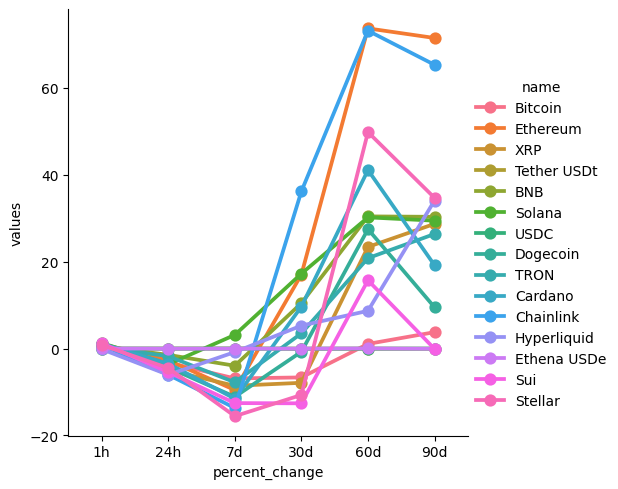

In [30]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [6]:
# Check if we have data and load from CSV if needed
try:
    # Try to use existing df variable if it exists
    if 'df' in globals() and len(df) > 0:
        print(f"Current df shape: {df.shape}")
        print(f"Unique timestamps in df: {df['timestamp'].nunique()}")
        df_from_memory = True
    else:
        df_from_memory = False
        print("df not found in memory, loading from CSV...")
except NameError:
    df_from_memory = False
    print("df not defined, loading from CSV...")

# Load from CSV file
try:
    df_csv = pd.read_csv('crypto_data.csv')
    df_csv['timestamp'] = pd.to_datetime(df_csv['timestamp'])
    print(f"CSV df shape: {df_csv.shape}")
    
    if df_from_memory and len(df_csv) > len(df):
        print("Using CSV data as it has more records")
        df10 = df_csv[['name','quote.USD.price','timestamp']]
        df10 = df10.query("name == 'Bitcoin'")
        print(f"Bitcoin records from CSV: {len(df10)}")
    elif df_from_memory:
        print("Using memory data")
        df10 = df[['name','quote.USD.price','timestamp']]
        df10 = df10.query("name == 'Bitcoin'")
        print(f"Bitcoin records from memory: {len(df10)}")
    else:
        print("Using CSV data (only available source)")
        df10 = df_csv[['name','quote.USD.price','timestamp']]
        df10 = df10.query("name == 'Bitcoin'")
        print(f"Bitcoin records from CSV: {len(df10)}")
        
        # Also load df from CSV for future use
        df = df_csv.copy()
        print("✅ Loaded df from CSV for future use")
        
except Exception as e:
    print(f"❌ Error loading CSV: {e}")
    print("No data available")
    df10 = pd.DataFrame()

df10

Current df shape: (30, 37)
Unique timestamps in df: 2
CSV df shape: (30, 37)
Using memory data
Bitcoin records from memory: 2


,name,quote.USD.price,timestamp
0,Bitcoin,107696.879844,2025-08-30 03:56:34.928260
15,Bitcoin,107696.879844,2025-08-30 03:56:48.420967


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

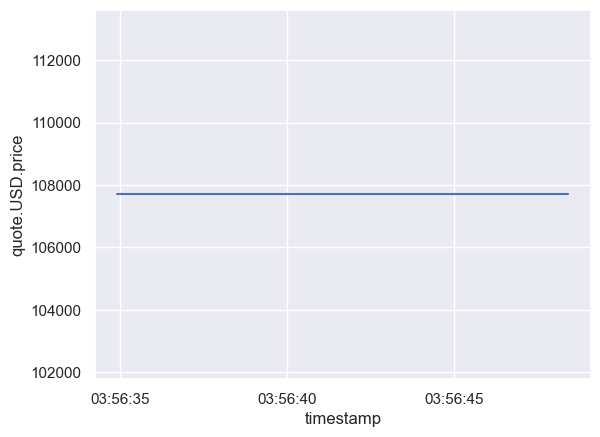

In [10]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

In [ ]:
# 🚀 QUICK BITCOIN DATA COLLECTION
# This collects real Bitcoin data every 2 minutes for 15 minutes = 7 data points

def quick_bitcoin_collection(duration_minutes=5, interval_minutes=1):
    """Collect Bitcoin data quickly with shorter intervals"""
    import time
    from datetime import datetime, timedelta
    
    total_collections = duration_minutes // interval_minutes
    print(f"🚀 Quick Bitcoin Collection Starting!")
    print(f"⏰ Every {interval_minutes} minutes for {duration_minutes} minutes")
    print(f"📊 Will collect {total_collections} data points")
    print(f"🏁 Finishing at: {(datetime.now() + timedelta(minutes=duration_minutes)).strftime('%H:%M:%S')}")
    print("\n" + "="*50)
    
    for i in range(total_collections):
        print(f"\n🔄 Collection {i+1}/{total_collections} at {datetime.now().strftime('%H:%M:%S')}")
        
        # Collect data
        api_runner()
        
        # Show Bitcoin progress
        if 'df' in globals() and len(df) > 0:
            bitcoin_data = df[df['name'] == 'Bitcoin']
            if len(bitcoin_data) >= 1:
                latest_price = bitcoin_data.iloc[-1]['quote.USD.price']
                print(f"💰 Bitcoin: ${latest_price:,.2f}")
                print(f"📊 Total Bitcoin records: {len(bitcoin_data)}")
                
                # Show price change if we have previous data
                if len(bitcoin_data) >= 2:
                    previous_price = bitcoin_data.iloc[-2]['quote.USD.price']
                    change = latest_price - previous_price
                    change_percent = (change / previous_price) * 100
                    direction = "📈" if change > 0 else "📉" if change < 0 else "➡️"
                    print(f"{direction} Change: ${change:+.2f} ({change_percent:+.3f}%)")
        
        # Update chart every 3 collections
        if (i + 1) % 3 == 0 and 'df' in globals():
            bitcoin_df = df[df['name'] == 'Bitcoin'][['timestamp', 'quote.USD.price']]
            if len(bitcoin_df) > 1:
                print("📈 Updating chart...")
                plt.figure(figsize=(12, 6))
                plt.plot(bitcoin_df['timestamp'], bitcoin_df['quote.USD.price'], 
                        marker='o', linewidth=2, color='orange', markersize=6)
                plt.title(f'Bitcoin Price - Live Collection (Point {i+1})')
                plt.xlabel('Time')
                plt.ylabel('Price (USD)')
                plt.xticks(rotation=45)
                plt.grid(True, alpha=0.3)
                plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
                plt.tight_layout()
                plt.show()
        
        # Wait before next collection (except last one)
        if i < total_collections - 1:
            print(f"⏳ Waiting {interval_minutes} minutes...")
            time.sleep(interval_minutes * 60)
    
    print(f"\n🎉 COLLECTION COMPLETE!")
    if 'df' in globals():
        bitcoin_final = df[df['name'] == 'Bitcoin']
        print(f"📊 Final Bitcoin records: {len(bitcoin_final)}")
        
        # Show final chart with all data
        if len(bitcoin_final) > 1:
            plt.figure(figsize=(15, 8))
            plt.plot(bitcoin_final['timestamp'], bitcoin_final['quote.USD.price'], 
                    marker='o', linewidth=3, markersize=8, color='orange', alpha=0.8)
            plt.title('🚀 Bitcoin Price Movement - Quick Collection Complete!', fontsize=16)
            plt.xlabel('Time', fontsize=12)
            plt.ylabel('Price (USD)', fontsize=12)
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
            
            # Add price range info
            min_price = bitcoin_final['quote.USD.price'].min()
            max_price = bitcoin_final['quote.USD.price'].max()
            plt.text(0.02, 0.98, f'Range: ${min_price:,.0f} - ${max_price:,.0f}', 
                    transform=plt.gca().transAxes, fontsize=10, 
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                    verticalalignment='top')
            
            plt.tight_layout()
            plt.show()

# 🎯 TO RUN: Uncomment one of these lines:

# quick_bitcoin_collection()                                    # 5 minutes, every 1 minute  
# quick_bitcoin_collection(duration_minutes=10, interval_minutes=2)   # 10 minutes, every 2 minutes
# quick_bitcoin_collection(duration_minutes=30, interval_minutes=5)   # 30 minutes, every 5 minutes

print("💡 TO START: Uncomment one of the lines above and run this cell!")
print("💡 FASTEST: quick_bitcoin_collection() - 5 minutes with 5 data points")

💡 TO START: Uncomment one of the lines above and run this cell!
💡 FASTEST: quick_bitcoin_collection() - 15 minutes with 7 data points


In [ ]:
 quick_bitcoin_collection()

🚀 Quick Bitcoin Collection Starting!
⏰ Every 2 minutes for 15 minutes
📊 Will collect 7 data points
🏁 Finishing at: 04:15:33


🔄 Collection 1/7 at 04:00:33
✅ Saved to local file: crypto_data.csv
✅ Also saved to M: drive: M:\Data\Automating-Crypto-Website-API\API.csv
📊 Data collected. Total records in memory: 45
💰 Bitcoin: $107,851.90
📊 Total Bitcoin records: 3
📈 Change: $+155.02 (+0.144%)
⏳ Waiting 2 minutes...
✅ Saved to local file: crypto_data.csv
✅ Also saved to M: drive: M:\Data\Automating-Crypto-Website-API\API.csv
📊 Data collected. Total records in memory: 45
💰 Bitcoin: $107,851.90
📊 Total Bitcoin records: 3
📈 Change: $+155.02 (+0.144%)
⏳ Waiting 2 minutes...
